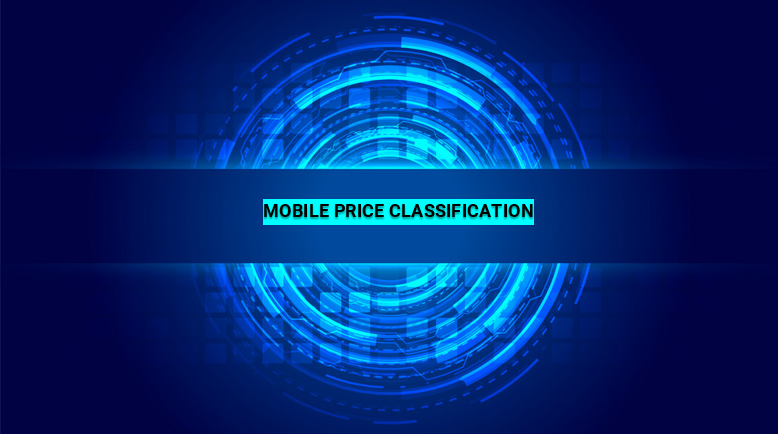

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the dataset
dataset = pd.read_csv(r"C:\Users\omdes\Desktop\data\Dataset-main\MobilePriceRange (1).csv")
dataset

,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,...,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PxHeight,PxWeight,PriceRange
0,842,7,2.2,2,2549,19,0,0,0,1,...,0.6,188,0,9,7,1,2,20,756,Medium
1,1021,53,0.5,3,2631,7,1,1,1,0,...,0.7,136,1,17,3,0,6,905,1988,High
2,563,41,0.5,5,2603,9,1,1,1,0,...,0.9,145,1,11,2,2,6,1263,1716,High
3,615,10,2.5,6,2769,11,0,1,0,0,...,0.8,131,0,16,8,0,9,1216,1786,High
4,1821,44,1.2,2,1411,15,0,1,1,0,...,0.6,141,1,8,2,13,14,1208,1212,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,2,0.5,6,668,19,1,1,1,0,...,0.8,106,1,13,4,0,14,1222,1890,Low
1996,1965,39,2.6,4,2032,16,1,1,0,1,...,0.2,187,1,11,10,0,3,915,1965,High
1997,1911,36,0.9,8,3057,5,1,1,1,0,...,0.7,108,1,9,1,1,3,868,1632,VeryHigh
1998,1512,46,0.9,5,869,19,0,1,1,1,...,0.1,145,1,18,10,4,5,336,670,Low


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BatteryPower    2000 non-null   int64  
 1   InternalMemory  2000 non-null   int64  
 2   ClockSpeed      2000 non-null   float64
 3   NoOfCores       2000 non-null   int64  
 4   RAM             2000 non-null   int64  
 5   TalkTime        2000 non-null   int64  
 6   DualSim         2000 non-null   int64  
 7   3G              2000 non-null   int64  
 8   4G              2000 non-null   int64  
 9   WiFi            2000 non-null   int64  
 10  Bluetooth       2000 non-null   int64  
 11  MobileDepth     2000 non-null   float64
 12  MobileWeight    2000 non-null   int64  
 13  TouchScreen     2000 non-null   int64  
 14  ScreenHeight    2000 non-null   int64  
 15  ScreenWidth     2000 non-null   int64  
 16  FrontCameraPx   2000 non-null   int64  
 17  RearCameraPX    2000 non-null   i

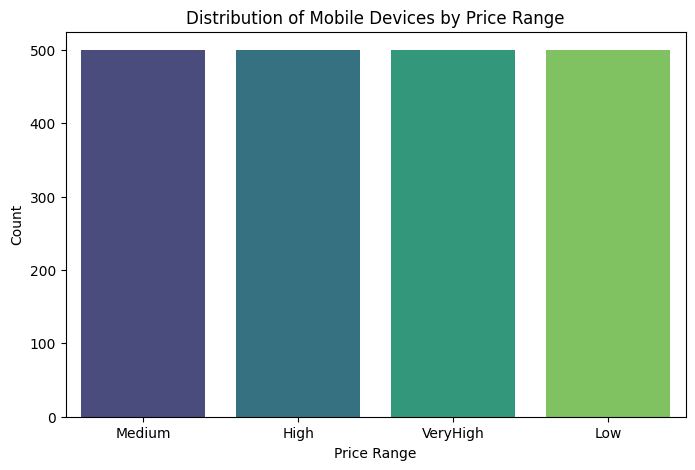

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x='PriceRange', data=dataset, palette='viridis')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Mobile Devices by Price Range')
plt.show()

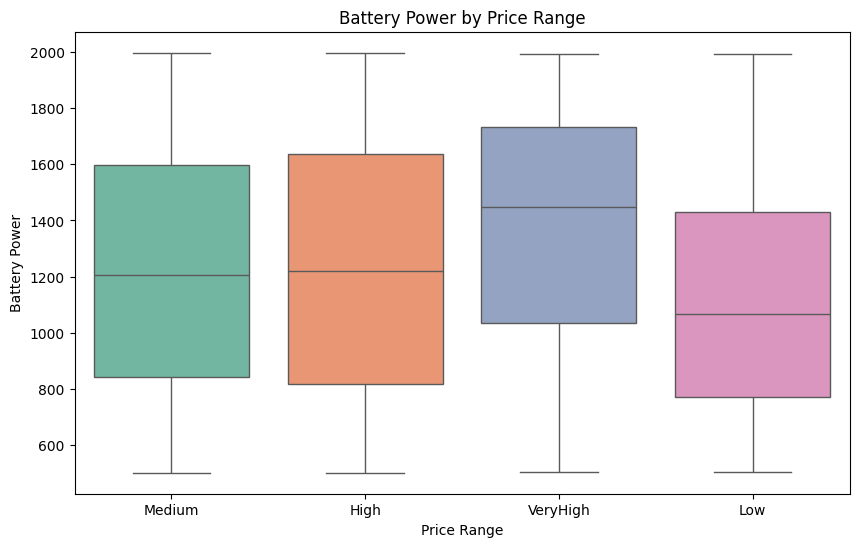

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PriceRange', y='BatteryPower', data=dataset, palette='Set2')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.title('Battery Power by Price Range')
plt.show()

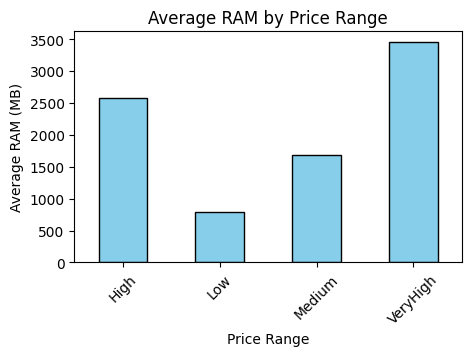

In [7]:
plt.figure(figsize=(5, 3))
avg_ram = dataset.groupby('PriceRange')['RAM'].mean().sort_index()
avg_ram.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Price Range')
plt.ylabel('Average RAM (MB)')
plt.title('Average RAM by Price Range')
plt.xticks(rotation=45)
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()
dataset['PriceRange'] = label_encoder.fit_transform(dataset['PriceRange'])

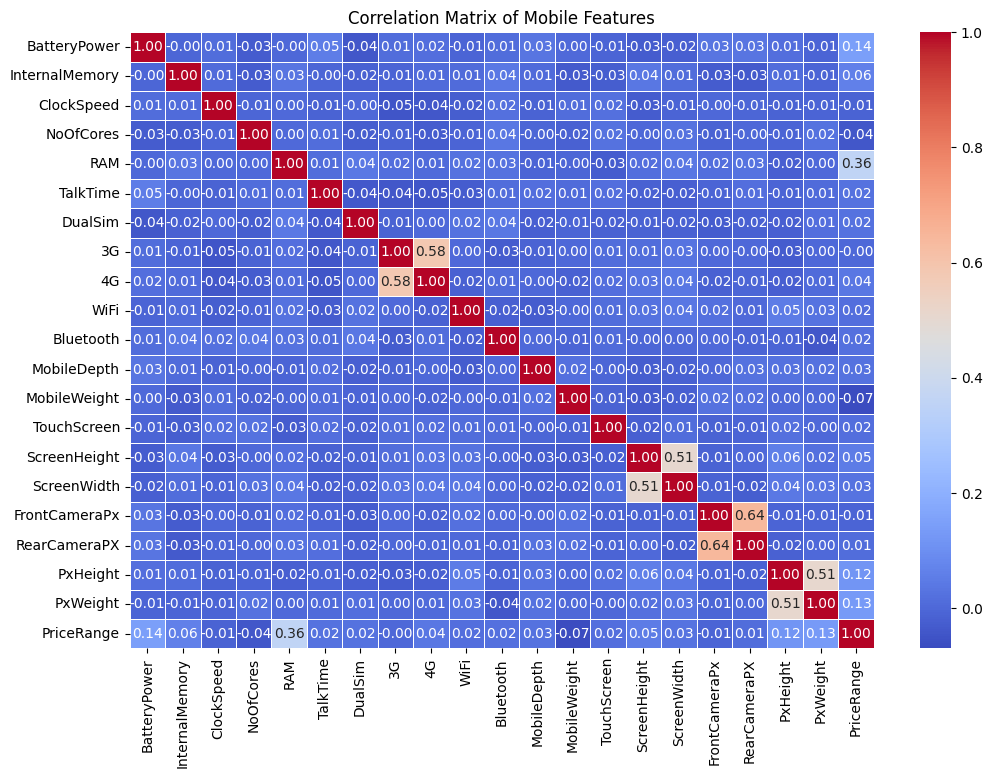

In [10]:
plt.figure(figsize=(12, 8))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Mobile Features')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
x = dataset.iloc[:, : -1].values

y = dataset.iloc[:, -1].values

x = StandardScaler().fit_transform(x)

In [12]:
x

array([[-0.90259726, -1.38064353,  0.83077942, ..., -1.3057501 ,
        -1.40894856, -1.14678403],
       [-0.49513857,  1.15502422, -1.2530642 , ..., -0.64598879,
         0.58577791,  1.70446468],
       [-1.5376865 ,  0.49354568, -1.2530642 , ..., -0.64598879,
         1.39268422,  1.07496821],
       ...,
       [ 1.53077336,  0.21792962, -0.76274805, ..., -1.14080978,
         0.50238257,  0.88056489],
       [ 0.62252745,  0.76916174, -0.76274805, ..., -0.81092912,
        -0.69670724, -1.34581601],
       [-1.65833069,  0.71403853,  0.58562134, ...,  1.00341448,
        -0.3653798 , -1.15141268]])

In [13]:
y

array([2, 0, 0, ..., 3, 1, 3])

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [15]:
x_train

array([[-0.0148381 , -0.44354893,  1.68883267, ...,  1.16835481,
        -0.64035904, -1.0241248 ],
       [ 1.36915567,  0.10768319, -1.2530642 , ...,  1.00341448,
        -0.75305545,  0.67921859],
       [ 1.03226245, -1.65625959,  0.70820038, ...,  1.16835481,
         2.82618257,  1.51006135],
       ...,
       [-0.11044293,  0.43842247,  0.58562134, ..., -1.47069043,
         1.69921846,  0.91296544],
       [-0.10816662, -1.04990426,  1.07593749, ..., -0.48104847,
        -1.05057398,  1.29945776],
       [-1.21217481, -0.05768644, -1.2530642 , ...,  1.49823547,
        -0.2301441 , -0.72557684]])

In [16]:
x_train.shape

(1600, 20)

In [17]:
y_train

array([1, 2, 3, ..., 3, 1, 2])

In [18]:
x_test.shape

(400, 20)

In [19]:
y_test

array([3, 1, 0, 0, 0, 1, 1, 3, 3, 2, 2, 3, 1, 0, 3, 1, 3, 0, 0, 2, 1, 1,
       3, 2, 0, 0, 3, 2, 3, 2, 2, 1, 0, 1, 2, 3, 1, 1, 3, 3, 3, 2, 3, 3,
       2, 3, 1, 2, 3, 2, 2, 3, 1, 3, 1, 3, 0, 0, 1, 3, 3, 2, 3, 0, 2, 0,
       3, 0, 0, 0, 3, 0, 2, 1, 2, 3, 0, 0, 2, 0, 3, 3, 3, 1, 1, 1, 0, 2,
       0, 3, 2, 0, 0, 2, 1, 3, 3, 3, 1, 3, 2, 2, 0, 2, 3, 0, 0, 3, 0, 3,
       3, 1, 1, 2, 3, 3, 1, 1, 2, 1, 1, 3, 0, 0, 2, 2, 2, 2, 1, 0, 2, 3,
       0, 3, 3, 3, 3, 0, 1, 2, 2, 0, 2, 3, 2, 3, 1, 1, 0, 1, 2, 2, 2, 2,
       3, 1, 1, 3, 2, 3, 0, 2, 3, 2, 0, 3, 3, 0, 2, 1, 3, 2, 0, 3, 3, 1,
       0, 0, 3, 1, 0, 2, 1, 2, 0, 2, 0, 1, 3, 3, 2, 2, 1, 0, 3, 1, 2, 0,
       0, 1, 3, 3, 3, 2, 0, 3, 3, 3, 1, 1, 1, 0, 3, 3, 1, 1, 2, 3, 2, 3,
       3, 3, 1, 1, 0, 3, 3, 2, 1, 0, 1, 1, 1, 3, 0, 1, 0, 0, 2, 2, 1, 0,
       3, 3, 1, 1, 2, 3, 3, 0, 3, 1, 3, 2, 2, 1, 0, 3, 3, 0, 1, 1, 2, 0,
       3, 0, 0, 3, 0, 2, 1, 3, 3, 0, 2, 3, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1,
       0, 0, 0, 0, 1, 2, 3, 1, 2, 0, 3, 1, 0, 1, 2,

In [20]:
from sklearn.linear_model import LogisticRegression
Ireg = LogisticRegression()
Ireg.fit(x_train, y_train)

LogisticRegression()

In [21]:
y_pred = Ireg.predict(x_test)
y_pred

array([3, 1, 0, 0, 3, 1, 1, 3, 3, 2, 2, 3, 1, 0, 3, 1, 3, 0, 0, 2, 1, 1,
       3, 2, 0, 0, 3, 2, 3, 2, 2, 1, 0, 1, 0, 3, 1, 1, 3, 3, 3, 2, 3, 3,
       2, 3, 1, 2, 3, 2, 2, 3, 1, 3, 1, 0, 0, 0, 1, 3, 3, 2, 3, 0, 2, 0,
       3, 0, 0, 0, 3, 0, 2, 1, 2, 3, 0, 0, 2, 0, 3, 3, 3, 1, 1, 1, 0, 2,
       0, 3, 2, 0, 0, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 2, 3, 0, 0, 3, 0, 3,
       3, 1, 1, 2, 3, 3, 1, 1, 2, 1, 1, 3, 0, 0, 2, 0, 2, 2, 1, 0, 2, 3,
       3, 3, 3, 3, 3, 0, 1, 2, 2, 0, 2, 3, 1, 3, 1, 1, 0, 1, 2, 2, 2, 2,
       3, 1, 1, 3, 2, 3, 0, 2, 3, 2, 0, 3, 3, 0, 2, 1, 3, 2, 0, 3, 3, 1,
       0, 0, 3, 2, 0, 2, 1, 2, 0, 0, 0, 1, 3, 3, 2, 2, 1, 0, 3, 1, 2, 0,
       0, 1, 3, 3, 3, 2, 0, 3, 3, 3, 1, 1, 1, 0, 3, 3, 1, 1, 2, 3, 0, 3,
       3, 3, 1, 1, 0, 3, 3, 2, 1, 0, 1, 1, 1, 3, 0, 2, 0, 0, 2, 2, 1, 0,
       3, 3, 1, 1, 2, 3, 3, 2, 3, 1, 3, 2, 2, 1, 0, 3, 3, 0, 1, 1, 2, 0,
       3, 0, 0, 3, 0, 2, 1, 3, 3, 0, 2, 3, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1,
       0, 0, 0, 3, 1, 2, 3, 1, 0, 0, 3, 1, 0, 1, 2,

In [22]:
#accuracy of model using logistic regression
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy = accuracy_score (y_test, y_pred) * 100
print("The Accuracy of Logistic Regression Model: ",accuracy)

The Accuracy of Logistic Regression Model:  95.5


In [23]:
#confusion matrix of model using logistic regression
print(confusion_matrix(y_test,y_pred))

[[ 91   0   3   5]
 [  0  93   2   0]
 [  5   2  85   0]
 [  1   0   0 113]]
